In [98]:
import numpy as np
import pycbc.conversions as pc
import pycbc.pnutils as pnu
import pandas as pd
import h5py, os

from collections import defaultdict

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random

import sys
from lal import YRJUL_SI

import seaborn as sns

import ast

In [99]:
def save_dict_to_hdf5(dic, filename):
    """
    ....
    """
    with h5py.File(filename, 'w') as h5file:
        recursively_save_dict_contents_to_group(h5file, '/', dic)

def recursively_save_dict_contents_to_group(h5file, path, dic):
    """
    ....
    """
    for key, item in dic.items():
        if isinstance(item, (np.ndarray, np.int64, np.float64, str, bytes)):
            h5file[path + key] = item
        elif isinstance(item, dict):
            recursively_save_dict_contents_to_group(h5file, path + key + '/', item)
        else:
            raise ValueError('Cannot save %s type'%type(item))

def load_dict_from_hdf5(filename):
    """
    ....
    """
    with h5py.File(filename, 'r') as h5file:
        return recursively_load_dict_contents_from_group(h5file, '/')

def recursively_load_dict_contents_from_group(h5file, path):
    """
    ....
    """
    ans = {}
    for key, item in h5file[path].items():
        if isinstance(item, h5py._hl.dataset.Dataset):
            ans[key] = item[()]
        elif isinstance(item, h5py._hl.group.Group):
            ans[key] = recursively_load_dict_contents_from_group(h5file, path + key + '/')
            
    return ans


def print_some_rcParams():
    rc_keys = ['backend', 'axes.labelsize', 'axes.titlesize', 'font.size',
        'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize', 'font.family',
        'text.usetex', 'figure.figsize'] # 'font.sans-serif', 'font.serif'
    print('Using the following matplotlib settings:')
    for k in rc_keys:
        print(k, ':', plt.rcParams[k])

In [100]:
ifar_threshold = 10 ## yr 
number_injection = 10

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [102]:
#This is the first file, all events are true
injection_file = '/home/bhooshan.gadre/work/O3/sub_solar_search/O3B_VTs/ssm-search/O3b_VTs/common_ssm_injections.hdf'
injections = load_dict_from_hdf5(injection_file)
injections.keys(), len(injections.keys())

(dict_keys(['coa_phase', 'declination', 'distance', 'gstlal_ifar', 'gstlal_weight', 'inclination', 'mass1_source', 'mass2_source', 'mbta_ifar', 'polarization', 'pycbc_ifar', 'right_ascension', 'snr_H', 'snr_L', 'snr_V', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'time']),
 22)

In [103]:
df_true = pd.DataFrame(injections)
df_true

,coa_phase,declination,distance,gstlal_ifar,gstlal_weight,inclination,mass1_source,mass2_source,mbta_ifar,polarization,pycbc_ifar,right_ascension,snr_H,snr_L,snr_V,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,time
0,1.463821,-1.232698,231.483117,0.0,0.666667,2.867627,1.692460,0.501600,0.0,2.515262,0.0,0.164688,2.440571,2.957571,1.361124,0.053696,0.053141,-0.037187,0.057080,-0.011039,0.007150,1.238166e+09
1,0.673478,-0.622410,458.599031,0.0,1.000000,0.918732,6.421466,0.763863,0.0,0.135494,0.0,2.177941,2.684150,2.988815,1.259368,-0.025080,-0.011637,0.021298,0.020269,0.071086,0.038439,1.238166e+09
2,5.447231,-1.440067,302.357273,0.0,0.666667,0.854144,10.481894,1.045793,0.0,0.132165,0.0,2.621765,4.408046,6.731172,1.315282,-0.004171,-0.046270,0.012784,0.021928,-0.027524,-0.030501,1.238166e+09
3,5.521864,-1.276307,463.341251,0.0,0.666667,0.494481,8.906005,0.811978,0.0,1.828451,0.0,3.177169,2.049177,3.539541,0.762279,0.000633,0.001265,-0.000504,0.004547,-0.011592,-0.004068,1.238166e+09
4,0.183151,-0.734805,833.927353,0.0,1.000000,2.895566,7.129897,0.808812,0.0,2.805147,0.0,2.219308,2.389652,3.215351,0.549881,-0.051269,0.011986,-0.001127,-0.021172,0.014852,-0.003302,1.238166e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916578,0.187059,-0.469964,752.284246,0.0,1.000000,0.388063,5.784159,0.559250,0.0,3.122078,0.0,4.757083,2.959844,2.958614,0.812961,-0.032232,0.036856,-0.038265,-0.001476,0.035159,-0.032295,1.269562e+09
1916579,0.141624,-0.272180,643.259480,0.0,0.666667,3.032152,8.621294,0.868851,0.0,0.817515,0.0,1.586071,2.718237,3.586084,3.759479,-0.007036,-0.019932,0.032837,-0.038478,0.020862,-0.010397,1.269562e+09
1916580,1.174031,-0.227858,349.130344,0.0,0.666667,2.206089,10.560706,0.717379,0.0,1.318691,0.0,3.475683,3.402718,2.469075,1.012893,0.004500,-0.054032,-0.029833,0.062644,0.023295,-0.031378,1.269562e+09
1916581,5.752044,0.708430,455.222188,0.0,1.000000,2.115026,5.727628,0.886952,0.0,1.553802,0.0,2.464774,2.854940,3.862371,0.634093,-0.028952,-0.016063,-0.024699,-0.048624,-0.022375,0.007844,1.269562e+09


In [104]:
df_true = df_true.drop(columns=['coa_phase', 'declination', 'distance', 'gstlal_ifar', 'gstlal_weight', 'inclination', 'mbta_ifar', 'polarization', 
                                'right_ascension', 'snr_H', 'snr_L', 'snr_V', 'spin1x', 'spin1y', 'spin2x', 'spin2y', 'time'])

#df_true_true['label'] = 1

df_true = df_true.rename(columns={'mass2_source': 'mass2', 
                                  'mass1_source': 'mass1'})

df_true

,mass1,mass2,pycbc_ifar,spin1z,spin2z
0,1.692460,0.501600,0.0,-0.037187,0.007150
1,6.421466,0.763863,0.0,0.021298,0.038439
2,10.481894,1.045793,0.0,0.012784,-0.030501
3,8.906005,0.811978,0.0,-0.000504,-0.004068
4,7.129897,0.808812,0.0,-0.001127,-0.003302
...,...,...,...,...,...
1916578,5.784159,0.559250,0.0,-0.038265,-0.032295
1916579,8.621294,0.868851,0.0,0.032837,-0.010397
1916580,10.560706,0.717379,0.0,-0.029833,-0.031378
1916581,5.727628,0.886952,0.0,-0.024699,0.007844


In [105]:
#this the background
trig_file = "/home/pycbc.offline/O3/production/O3A_SUB_SOLAR/sub_solar/STATMAP/H1L1V1-COMBINE_STATMAP_FULL_DATA-1238787802-853441.hdf"
bank_file = "/home/pycbc.offline/O3/production/O3A_SUB_SOLAR/sub_solar/BANK/H1L1V1-BANK2HDF-1238787802-853441.hdf"

In [106]:
%%time
bank = h5py.File(bank_file, 'r')
hashes = bank['template_hash'][:]

bank_tids = hashes.argsort()
fields = ['mass1', 'mass2', 'spin1z', 'spin2z']
trigs = h5py.File(trig_file, 'r')

trig_params = defaultdict(list)
for tid in trigs['background']['template_id'][:number_injection]:  ## test with 10 triggers. Later this can be [:] for all triggers
    bank_idx = np.argwhere(bank_tids == tid)[0]
    for k in fields:
        trig_params[k].append(bank[k][:][bank_idx][0])
#print(trig_params)

CPU times: user 276 ms, sys: 139 ms, total: 415 ms
Wall time: 417 ms


In [107]:
print(trig_params)

defaultdict(<class 'list'>, {'mass1': [0.5049287468690198, 1.4890962096222466, 0.5584945606105989, 0.30992199092256534, 0.20621452536587256, 6.0120204674999655, 0.9745523320171033, 0.5214335060019926, 0.5423446824343688, 1.0842931303911676], 'mass2': [0.21458005221417903, 0.21205771715862032, 0.2044448030937099, 0.2008728164584661, 0.20621452536587256, 0.7340735619694843, 0.2556743567108287, 0.20865151534506626, 0.20605241989917558, 0.27170560413115535], 'spin1z': [-0.6862350742339347, -0.7286678705958807, 0.7745876481316094, -0.09982390851178215, 0.09989187095218796, 0.8999412988935003, 0.4513576754964428, 0.6390865474789664, -0.7355112205159183, -0.5541470127492194], 'spin2z': [-0.056092396754344645, 0.024225545145718428, 0.006712229612723681, -0.07828719811217069, 0.09990277072233664, 0.41893731416659385, -0.08913105732121088, 0.08529964032606609, 0.010133644484569012, 0.022674100783847937]})


In [108]:
len(trigs['background']['template_id'])

39955275

In [109]:
len(trigs['background_h0']['H1L1']['ifar'])

16322600

In [110]:
len(trigs['background_h0']['H1L1V1']['ifar'][:])

127274

In [111]:
trigs['background_h0']['H1L1V1']['ifar'][:10]

array([1.83540772, 0.02920396, 4.81109905, 0.03547405, 0.07905803,
       2.01532598, 0.00685824, 0.51929064, 0.03567827, 0.38252941])

In [112]:
background_file = '/home/lucashernan.quiceno/background/output.txt'

with open(background_file, 'r') as file:
    content = file.read()

# Convert the contents of the file into a Python dictionary
data_dict = ast.literal_eval(content.replace("defaultdict(<class 'list'>, ", "").rstrip(')'))

# Convert the dictionary to a DataFrame
df_false = pd.DataFrame(data_dict)

df_false

,mass1,mass2,spin1z,spin2z
0,0.504929,0.214580,-0.686235,-0.056092
1,1.489096,0.212058,-0.728668,0.024226
2,0.558495,0.204445,0.774588,0.006712
3,0.309922,0.200873,-0.099824,-0.078287
4,0.206215,0.206215,0.099892,0.099903
...,...,...,...,...
1916578,0.864843,0.247605,-0.416889,0.025385
1916579,0.501223,0.202115,-0.743296,-0.011618
1916580,0.956881,0.213006,-0.813010,0.049815
1916581,0.808391,0.312963,-0.449955,-0.030445


In [113]:
#df_false = pd.DataFrame(trig_params)

df_false['pycbc_ifar'] = trigs['background_h0']['H1L1']['ifar'][:1916583]

#df_false['label'] = 0
df_false

,mass1,mass2,spin1z,spin2z,pycbc_ifar,label
0,0.504929,0.214580,-0.686235,-0.056092,0.000314,0
1,1.489096,0.212058,-0.728668,0.024226,0.000070,0
2,0.558495,0.204445,0.774588,0.006712,0.000018,0
3,0.309922,0.200873,-0.099824,-0.078287,0.000821,0
4,0.206215,0.206215,0.099892,0.099903,0.000288,0
...,...,...,...,...,...,...
1916578,0.864843,0.247605,-0.416889,0.025385,0.000010,0
1916579,0.501223,0.202115,-0.743296,-0.011618,0.000011,0
1916580,0.956881,0.213006,-0.813010,0.049815,0.000470,0
1916581,0.808391,0.312963,-0.449955,-0.030445,0.000045,0


In [114]:
columns_greater_than_10 = (df_false['pycbc_ifar'] > 10).sum()
print(f"Number of columns in 'ifar_false' greater than 10: {columns_greater_than_10}")

Number of columns in 'ifar_false' greater than 10: 358


In [115]:
columns_greater_than_10 = (df_true['pycbc_ifar'] > 10).sum()
print(f"Number of columns in 'ifar_true' greater than 10: {columns_greater_than_10}")

Number of columns in 'ifar_true' greater than 10: 63312


In [116]:
df = pd.concat([df_true, df_false], axis=0)
df

,mass1,mass2,pycbc_ifar,spin1z,spin2z,label
0,1.692460,0.501600,0.000000,-0.037187,0.007150,NaN
1,6.421466,0.763863,0.000000,0.021298,0.038439,NaN
2,10.481894,1.045793,0.000000,0.012784,-0.030501,NaN
3,8.906005,0.811978,0.000000,-0.000504,-0.004068,NaN
4,7.129897,0.808812,0.000000,-0.001127,-0.003302,NaN
...,...,...,...,...,...,...
1916578,0.864843,0.247605,0.000010,-0.416889,0.025385,0.0
1916579,0.501223,0.202115,0.000011,-0.743296,-0.011618,0.0
1916580,0.956881,0.213006,0.000470,-0.813010,0.049815,0.0
1916581,0.808391,0.312963,0.000045,-0.449955,-0.030445,0.0


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833166 entries, 0 to 1916582
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   mass1       float64
 1   mass2       float64
 2   pycbc_ifar  float64
 3   spin1z      float64
 4   spin2z      float64
 5   label       float64
dtypes: float64(6)
memory usage: 204.7 MB


In [119]:
df.describe()

,mass1,mass2,pycbc_ifar,spin1z,spin2z,label
count,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,1916583.0
mean,3.471293e+00,4.917871e-01,3.175995e+02,-7.708433e-02,3.945316e-03,0.0
std,3.106359e+00,2.840450e-01,3.890053e+03,3.816217e-01,1.290550e-01,0.0
min,1.958331e-01,1.900007e-01,0.000000e+00,-9.000000e-01,-8.999972e-01,0.0
25%,9.126695e-01,2.351717e-01,0.000000e+00,-1.657461e-01,-3.013016e-02,0.0
50%,2.096459e+00,3.842256e-01,1.548821e-06,-6.712440e-03,1.399800e-03,0.0
75%,5.674761e+00,7.272952e-01,4.354362e-05,3.252966e-02,3.906670e-02,0.0
max,1.099997e+01,1.100000e+00,1.427988e+05,9.000000e-01,8.999999e-01,0.0


In [121]:
X = df.drop('pycbc_ifar', axis=1)
y = df['pycbc_ifar']

In [122]:
X

,mass1,mass2,spin1z,spin2z
0,1.692460,0.501600,-0.037187,0.007150
1,6.421466,0.763863,0.021298,0.038439
2,10.481894,1.045793,0.012784,-0.030501
3,8.906005,0.811978,-0.000504,-0.004068
4,7.129897,0.808812,-0.001127,-0.003302
...,...,...,...,...
1916578,0.864843,0.247605,-0.416889,0.025385
1916579,0.501223,0.202115,-0.743296,-0.011618
1916580,0.956881,0.213006,-0.813010,0.049815
1916581,0.808391,0.312963,-0.449955,-0.030445


In [123]:
y

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1916578    0.000010
1916579    0.000011
1916580    0.000470
1916581    0.000045
1916582    0.000006
Name: pycbc_ifar, Length: 3833166, dtype: float64

In [124]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# max_depth = 3

In [27]:
max_depth = 3
model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

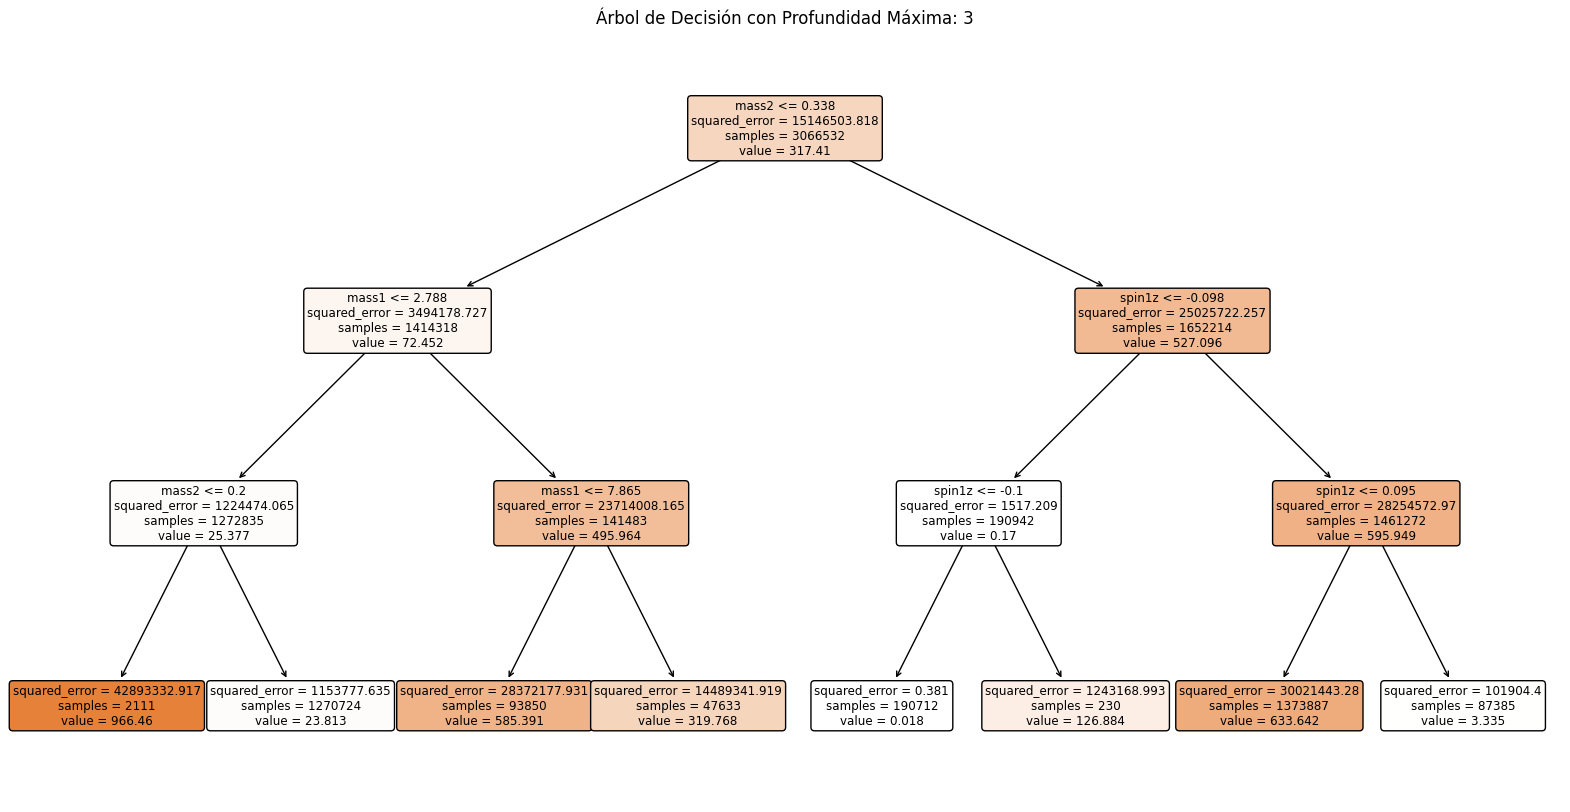

In [28]:
# Graph the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, impurity=True)
plt.title(f'Árbol de Decisión con Profundidad Máxima: {max_depth}')
plt.show()

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
'''# Graficar IFAR real vs. IFAR predicho
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel('IFAR Real')
plt.ylabel('IFAR Predicho')
plt.title(f'Comparación entre IFAR Real y Predicho (Profundidad Máxima: {max_depth})')
plt.show()'''

'# Graficar IFAR real vs. IFAR predicho\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)\nplt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")\nplt.xlabel(\'IFAR Real\')\nplt.ylabel(\'IFAR Predicho\')\nplt.title(f\'Comparación entre IFAR Real y Predicho (Profundidad Máxima: {max_depth})\')\nplt.show()'

In [31]:
len(y_test)

766634

In [32]:
(y_test > 10).sum()

12800

In [33]:
(y_pred > ifar_threshold).sum()/len(y_test)*100

90.94665772715533

In [125]:
#mse_list = []
#rmse_list = [] 
#mae_list = []
#mape_list = []
#r2_list = []
#prediction_values_list = []

def train_decision_tree(X, y, max_depth, ifar_threshold=10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Report the current max_depth
    print(f"Entrenando modelo con max_depth={max_depth}")

    # Create and train the model
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate and store the custom prediction
    prediction_value = (y_pred > ifar_threshold).sum() / len(y_test) * 100

    # Store the metrics in their respective lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)
    prediction_values_list.append(prediction_value)

    # Show results with comments specific to max_depth
    print(f"Predicción con max_depth={max_depth}: {prediction_value:.2f}%")
    print(f"MSE con max_depth={max_depth}: {mse:.4f}")
    print(f"RMSE con max_depth={max_depth}: {rmse:.4f}")
    print(f"MAE con max_depth={max_depth}: {mae:.4f}")
    print(f"MAPE con max_depth={max_depth}: {mape:.4f}")
    print(f"R^2 con max_depth={max_depth}: {r2:.4f}")
    print("-" * 40)

    # Return the model and metrics if necessary
    return model, mse, rmse, mae, mape, r2, prediction_value

In [126]:
mse_list = []
rmse_list = [] 
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []

# Rango de valores de max_depth: 1 a 5, luego 10, y de 10 en 10 hasta 100
max_depth_values = list(range(1, 6)) + [10] + list(range(20, 101, 10))

# Iterar sobre cada valor de max_depth y llamar a la función train_decision_tree
for max_depth in max_depth_values:
    train_decision_tree(X, y, max_depth, ifar_threshold=10)


Entrenando modelo con max_depth=1
Predicción con max_depth=1: 100.00%
MSE con max_depth=1: 15025383.2231
RMSE con max_depth=1: 3876.2589
MAE con max_depth=1: 621.4861
MAPE con max_depth=1: 1030603176309781888.0000
R^2 con max_depth=1: 0.0034
----------------------------------------
Entrenando modelo con max_depth=2
Predicción con max_depth=2: 93.80%
MSE con max_depth=2: 14996070.0476
RMSE con max_depth=2: 3872.4760
MAE con max_depth=2: 619.0282
MAPE con max_depth=2: 1242161087466860032.0000
R^2 con max_depth=2: 0.0053
----------------------------------------
Entrenando modelo con max_depth=3
Predicción con max_depth=3: 90.95%
MSE con max_depth=3: 14985345.8928
RMSE con max_depth=3: 3871.0910
MAE con max_depth=3: 617.8897
MAPE con max_depth=3: 1315453953174177536.0000
R^2 con max_depth=3: 0.0060
----------------------------------------
Entrenando modelo con max_depth=4
Predicción con max_depth=4: 90.97%
MSE con max_depth=4: 14984372.1255
RMSE con max_depth=4: 3870.9653
MAE con max_depth

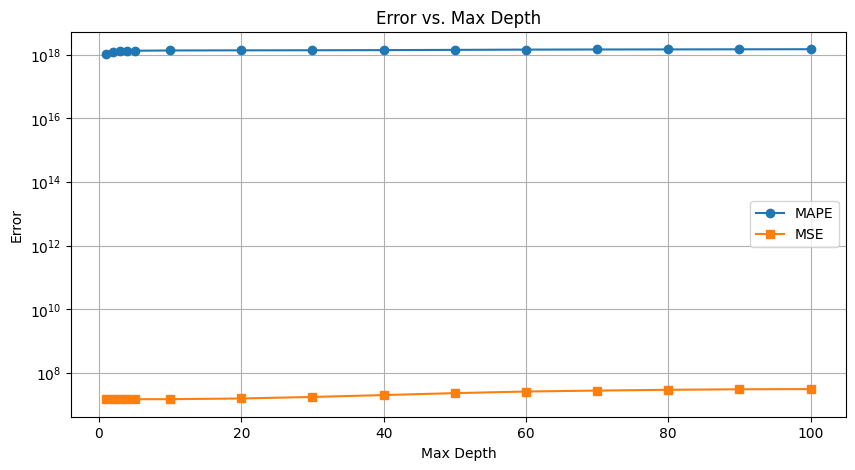

In [127]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.semilogy(max_depth_values, mape_list, label='MAPE', marker='o')
plt.semilogy(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Model with all data

In [128]:
mse_list = []
rmse_list = [] 
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []

train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 2.09%
MSE con max_depth=100: 31147904.5246
RMSE con max_depth=100: 5581.0308
MAE con max_depth=100: 650.9393
MAPE con max_depth=100: 1478736494772964352.0000
R^2 con max_depth=100: -1.0660
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 31147904.52459403,
 5581.030776173343,
 650.9392809901362,
 1.4787364947729644e+18,
 -1.0659843257353456,
 2.085871484958924)

In [131]:
df_true

,mass1,mass2,pycbc_ifar,spin1z,spin2z
0,1.692460,0.501600,0.0,-0.037187,0.007150
1,6.421466,0.763863,0.0,0.021298,0.038439
2,10.481894,1.045793,0.0,0.012784,-0.030501
3,8.906005,0.811978,0.0,-0.000504,-0.004068
4,7.129897,0.808812,0.0,-0.001127,-0.003302
...,...,...,...,...,...
1916578,5.784159,0.559250,0.0,-0.038265,-0.032295
1916579,8.621294,0.868851,0.0,0.032837,-0.010397
1916580,10.560706,0.717379,0.0,-0.029833,-0.031378
1916581,5.727628,0.886952,0.0,-0.024699,0.007844


# Model with df_true only

In [136]:
X = df_true.drop('pycbc_ifar', axis=1)
y = df_true['pycbc_ifar']

In [137]:
X

,mass1,mass2,spin1z,spin2z
0,1.692460,0.501600,-0.037187,0.007150
1,6.421466,0.763863,0.021298,0.038439
2,10.481894,1.045793,0.012784,-0.030501
3,8.906005,0.811978,-0.000504,-0.004068
4,7.129897,0.808812,-0.001127,-0.003302
...,...,...,...,...
1916578,5.784159,0.559250,-0.038265,-0.032295
1916579,8.621294,0.868851,0.032837,-0.010397
1916580,10.560706,0.717379,-0.029833,-0.031378
1916581,5.727628,0.886952,-0.024699,0.007844


In [138]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1916578    0.0
1916579    0.0
1916580    0.0
1916581    0.0
1916582    0.0
Name: pycbc_ifar, Length: 1916583, dtype: float64

In [139]:
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 3.67%
MSE con max_depth=100: 63377697.4968
RMSE con max_depth=100: 7961.0111
MAE con max_depth=100: 1313.8159
MAPE con max_depth=100: 3061930444997202944.0000
R^2 con max_depth=100: -1.1126
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 63377697.49675929,
 7961.011085079538,
 1313.8158642552817,
 3.061930444997203e+18,
 -1.1126219439004044,
 3.6698085396682116)

In [42]:
3061930444997202944.0000 > 1478736494772964352.0000

True

# Model with df_true['ifar']>10 only

In [140]:
df_true = df_true[df_true['pycbc_ifar'] > 10]
df_true

,mass1,mass2,pycbc_ifar,spin1z,spin2z
17,10.044697,0.771064,10174.474264,0.003799,-0.034952
39,9.871082,0.608848,10174.474264,0.003390,0.002160
45,6.012620,0.290126,10174.474264,0.022516,0.025649
52,1.566219,0.522978,10174.474264,0.032162,-0.004396
59,5.331335,0.458099,10174.474264,-0.004934,0.009750
...,...,...,...,...,...
1903266,6.626040,0.982731,69.997932,-0.030900,-0.025199
1903269,10.661847,0.462810,25146.646963,0.011288,0.066585
1903305,2.810979,0.813847,54.111754,0.012777,-0.049325
1903359,8.898606,0.641294,25146.646963,-0.067872,-0.015317


In [141]:
X = df_true.drop('pycbc_ifar', axis=1)
y = df_true['pycbc_ifar']

In [142]:
X

,mass1,mass2,spin1z,spin2z
17,10.044697,0.771064,0.003799,-0.034952
39,9.871082,0.608848,0.003390,0.002160
45,6.012620,0.290126,0.022516,0.025649
52,1.566219,0.522978,0.032162,-0.004396
59,5.331335,0.458099,-0.004934,0.009750
...,...,...,...,...
1903266,6.626040,0.982731,-0.030900,-0.025199
1903269,10.661847,0.462810,0.011288,0.066585
1903305,2.810979,0.813847,0.012777,-0.049325
1903359,8.898606,0.641294,-0.067872,-0.015317


In [143]:
mse_list = []
rmse_list = [] 
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []


max_depth_values = list(range(1, 6)) + [10] + list(range(20, 101, 10))

# Iterar sobre cada valor de max_depth y llamar a la función train_decision_tree
for max_depth in max_depth_values:
    train_decision_tree(X, y, max_depth, ifar_threshold=10)


Entrenando modelo con max_depth=1
Predicción con max_depth=1: 100.00%
MSE con max_depth=1: 553694704.9083
RMSE con max_depth=1: 23530.7183
MAE con max_depth=1: 17353.5801
MAPE con max_depth=1: 69.1668
R^2 con max_depth=1: -0.0004
----------------------------------------
Entrenando modelo con max_depth=2
Predicción con max_depth=2: 100.00%
MSE con max_depth=2: 553831718.6106
RMSE con max_depth=2: 23533.6295
MAE con max_depth=2: 17351.9264
MAPE con max_depth=2: 69.1791
R^2 con max_depth=2: -0.0006
----------------------------------------
Entrenando modelo con max_depth=3
Predicción con max_depth=3: 100.00%
MSE con max_depth=3: 554188973.6818
RMSE con max_depth=3: 23541.2186
MAE con max_depth=3: 17351.1964
MAPE con max_depth=3: 69.1433
R^2 con max_depth=3: -0.0013
----------------------------------------
Entrenando modelo con max_depth=4
Predicción con max_depth=4: 100.00%
MSE con max_depth=4: 554949420.0971
RMSE con max_depth=4: 23557.3645
MAE con max_depth=4: 17354.1567
MAPE con max_dep

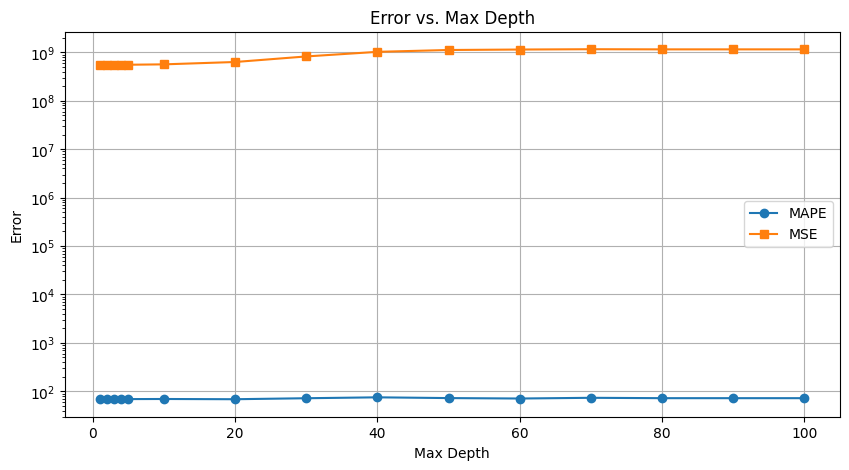

In [145]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.semilogy(max_depth_values, mape_list, label='MAPE', marker='o')
plt.semilogy(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

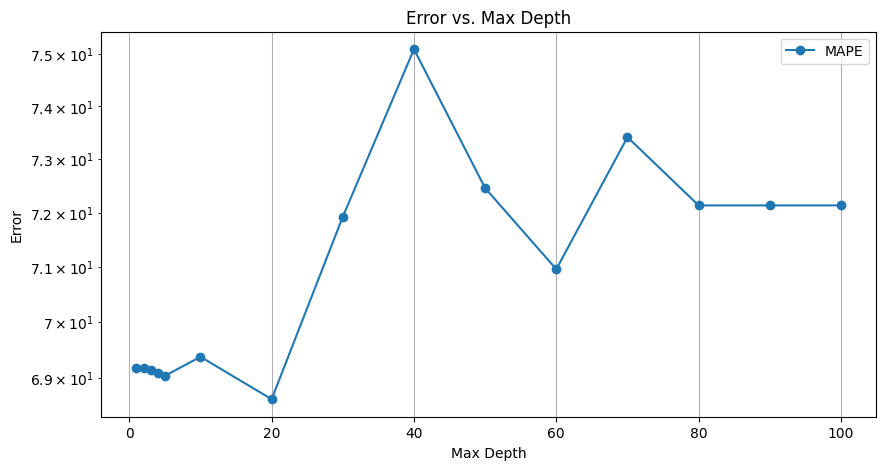

In [146]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.semilogy(max_depth_values, mape_list, label='MAPE', marker='o')
#plt.plot(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

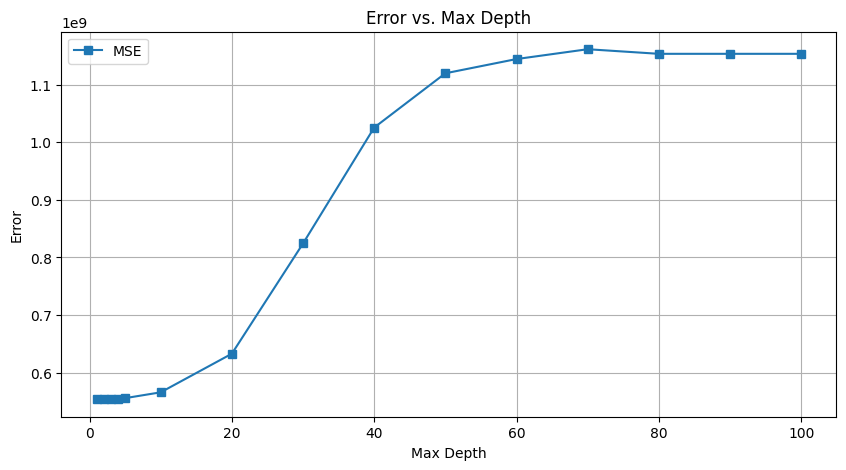

In [147]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

#plt.plot(max_depth_values, mape_list, label='MAPE', marker='o')
plt.plot(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [148]:
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 100.00%
MSE con max_depth=100: 1153901424.1939
RMSE con max_depth=100: 33969.1246
MAE con max_depth=100: 22258.2608
MAPE con max_depth=100: 72.1323
R^2 con max_depth=100: -1.0847
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 1153901424.1939359,
 33969.12457208658,
 22258.260760998674,
 72.13230781023844,
 -1.084748459332081,
 100.0)

# Model with df_true['ifar']>10 and  df_false['ifar']<10 only

In [149]:
df_false = df_false[df_false['pycbc_ifar'] < 10]

df_false = df_false.sample(n=63312, random_state=42)

df_false

,mass1,mass2,spin1z,spin2z,pycbc_ifar,label
454132,1.934271,0.227301,-0.682905,-0.092424,0.000016,0
1093296,0.918194,0.473268,-0.510612,-0.048572,0.000343,0
1818994,0.607539,0.207085,-0.874255,-0.073717,0.000007,0
1263156,1.993887,0.621623,0.653651,0.050412,0.000007,0
1675300,0.566373,0.207698,0.667466,0.082528,0.000187,0
...,...,...,...,...,...,...
1669704,1.160685,0.497299,-0.426851,-0.076927,0.000017,0
261168,1.915233,0.556279,-0.239111,-0.718426,0.000351,0
458780,3.017803,0.351750,-0.843459,0.021864,0.000001,0
696421,1.536451,0.350264,0.304015,0.088003,0.000033,0


In [150]:
df = pd.concat([df_true, df_false], axis=0)
df

,mass1,mass2,pycbc_ifar,spin1z,spin2z,label
17,10.044697,0.771064,10174.474264,0.003799,-0.034952,NaN
39,9.871082,0.608848,10174.474264,0.003390,0.002160,NaN
45,6.012620,0.290126,10174.474264,0.022516,0.025649,NaN
52,1.566219,0.522978,10174.474264,0.032162,-0.004396,NaN
59,5.331335,0.458099,10174.474264,-0.004934,0.009750,NaN
...,...,...,...,...,...,...
1669704,1.160685,0.497299,0.000017,-0.426851,-0.076927,0.0
261168,1.915233,0.556279,0.000351,-0.239111,-0.718426,0.0
458780,3.017803,0.351750,0.000001,-0.843459,0.021864,0.0
696421,1.536451,0.350264,0.000033,0.304015,0.088003,0.0


In [154]:
X = df.drop('pycbc_ifar', axis=1)
y = df['pycbc_ifar']

In [155]:
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 50.12%
MSE con max_depth=100: 576481072.8846
RMSE con max_depth=100: 24010.0203
MAE con max_depth=100: 11195.9934
MAPE con max_depth=100: 8641707.7786
R^2 con max_depth=100: -0.5865
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 576481072.884575,
 24010.020259978435,
 11195.993384308284,
 8641707.778574238,
 -0.5864571276775064,
 50.12043435340573)